In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

# Задание по numpy¶
Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности
Сравните по производительности основные операции с массивами (array) numpy и с list

In [2]:
def linspace_loop(low, high,  step=1):
    assert low < high
    assert step != 0
    linspace = [low, ]
    for i in range(round((high - low) / step)):
        linspace.append(linspace[-1] +  step)
    return linspace

def linspace_list_comprehension(low, high,  step=1):
    return [low + i * step for i in range(round((high-low)/step))]

In [3]:
%%timeit
x = linspace_list_comprehension(0, 1000)

477 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
%%timeit
x = linspace_loop(0, 1000)

700 µs ± 33.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
%%timeit
x = np.linspace(0, 1000)

97.3 µs ± 735 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Задание по scipy¶
Попробуйте поменять метод оптимизации в примере решения оптимизационной задачи выше, и подобрать метод с наименьшим количеством вычислений функции. Начальное приближение оставьте тем же.


In [6]:
a = np.ones(shape=(100, 1))
b = [1 for i in range(100)]

In [7]:
def append_list(lst, n):
    for i in range(n):
        lst.append(1)
    return lst

def append_numpy(array, n):
    for i in range(n):
        array = np.append(array, 1)
    return array

In [8]:
%%timeit
_ = append_list(b, 100)

44.8 µs ± 3.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%%timeit
_ = append_list(b, 100000)

50.7 ms ± 7.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%%timeit
_ = append_numpy(a, 100)

2.62 ms ± 43.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit
_ = append_numpy(a, 100000)

15.4 s ± 664 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
def sort_list(lisst):
    return sorted(lisst)

def sort_numpy(array):
    return np.sort(array)

In [13]:
a = np.arange(10000, 1, -1)
b = [x for x in reversed(range(10000))]

In [14]:
%%timeit
_ = sort_list(b)

859 µs ± 48.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%%timeit
_ = sort_numpy(a)

483 µs ± 17.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Задание по Matplotlib
Добавьте подписи к осям и легенду к примеру выше (см. документацию)
Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe
Сохраните рисунок в файл строчкой кода на Python### _3. Matplotlib_

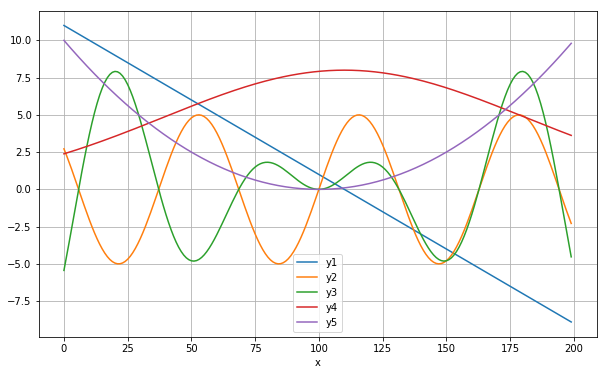

In [16]:
x = np.arange(-10, 10, 0.1)
functions = dict()
functions["y1"] = - x + 1
functions["y2"] = 5 * np.sin(x)
functions["y3"] = np.sin(x) * x
functions["y4"] = 8 * np.exp(-(x-1)**2 / 100)
functions["y5"] = x**2 / 10
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    plt.plot(functions["y"+str(i)], label="y"+str(i))
plt.xlabel("x")
plt.grid()
plt.legend();

## Задание на Numpy+Matplotlib
Сгенерируйте массив из 500 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 2x - 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
Сгенерируйте массив из 100 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
Изобразите первый и второй массив точек на плоскости (используя два разных цвета), а также график функии $f(x) = 2x - 1$ (используя какой-нибудь третий цвет)

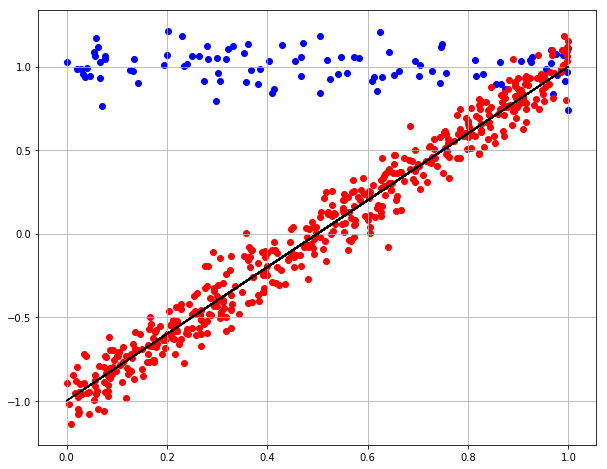

In [17]:
x = np.random.uniform(0, 1, size=(500, 1))
y = 2*x - 1 + np.random.normal(0, 0.1, size=(x.shape))
data_1 = np.hstack([x, y])

x = np.random.uniform(0, 1, size=(100, 1))
y = 1 + np.random.normal(0, 0.1, size=(x.shape))
data_2 = np.hstack([x, y])


plt.figure(figsize=(10, 8))
plt.scatter(data_2[:, 0], data_2[:, 1], c='b')
plt.scatter(data_1[:, 0], data_1[:, 1], c='r')
T = 2*x - 1
plt.plot(x, T, c='black')
plt.grid();